# Web Mining Final Project
## Name : Rudra Teja Potturi
## Title : Apple Watch Series 3 vs Samsung Gear S3 specs and ebay customer reviews analysis

Question : Does two similar products of different brands have comparable customer reviews on ebay? What kind of information can we get  from the customer reviews? What are the key features of both the products?

Answer : By the end of this project, a customer can come to an overview of the features and can compare reviews of both the products.

## Sentiment Analysis of customer reviews in ebay
1. Collecting the data of ten recent reviews for the Apple product from ebay using Beautiful Soup and displaying them in a list.

In [75]:
apple_url = 'https://www.ebay.com/urw/Apple-Watch-Series-3-38-mm-Smartwatch-GPS-Only-Silver-Aluminum-Case-White-Sport-Band-MTEY2LL-A-/product-reviews/4026508995'
import requests
from bs4 import BeautifulSoup
#reviews = []
page = requests.get(apple_url)
soup = BeautifulSoup(page.text, 'html5lib')
#print(soup)
body = soup.find_all('p', {'class':'review-item-content rvw-wrap-spaces'})
#article_text = body.text
#print(body)
apple_prod = list()
for i in body:
    apple_prod.append(i.text)
    print(i.text,'\n')
#print(apple_prod)

I’ve always wanted a Apple Watch and I am so happy with my purchase so far. I didn’t know it would take several hours to set up and download and update it but it was worth the wait. This is a very good deal. Brand new perfect condition. Still getting used to it but I feel like I’m going to love it.Read full review... 

Watch was legit Apple product. Packaging was fine, and box contained watch, charger and backup band. The hardware was Grade A refurbished, and it looked great, but......the watch's UI only responded properly when placed on a charger. As soon as my wife put it on her wrist, it would either not respond to certain touches and swipes, or it was extremely laggy. The OS may have been hosed somehow, but either way, it was a real Apple watch that didn't work well.Read full review... 

Product came in box with actual charger and extra brand no scratches better than first one I order the last one would only work sometimes screen kept freezing and glitching bad this one have a glit

2. Collecting the data of ten recent reviews for the Samsung product from ebay using Beautiful Soup and displaying them in a list.

In [90]:
samsung_url = 'https://www.ebay.com/urw/Samsung-Galaxy-Gear-S3-Classic-46-mm-Stainless-Steel-Silver-Case-and-Black-Leather-Band-SM-R770NZSAXAR-/product-reviews/230279544?_itm=333237167489'
samsung_page = requests.get(samsung_url)
soup1 = BeautifulSoup(samsung_page.text, 'html5lib')
samsung_body = soup1.find_all('p', {'class':'review-item-content rvw-wrap-spaces'})
samsung_prod = list()
for i in samsung_body:
    samsung_prod.append(i.text)
    print(i.text,'\n')
#print(samsung_prod)

My previous watches (Martian Notifier and Pebble) could be considered "semi-smart", so this is my first true smart watch.  I'm pretty amazed at what it can do. I have this paired with a non-Samsung Android phone, and all the functions appear to work fabulously.  I'm not into "health tracking" so the heart rate, activity reminders, calorie counter are of little use, but the notification features I use several times an hour.  Battery life for me has been about 1-1/2 days per charge.  The watch is slightly on the bigger size, but still looks pretty good on my slim wrists. The watch was listed as an open box/return item, but looks absolutely brand new.  Highly recommended!Read full review... 

I've got the Bluetooth version of this watch and it's great, so I decided to buy another one for a sibling. Little did I know, i ordered a cellular version, AT&T. Even tho I have AT&T, I couldn't get the standalone network to work at all. I did some digging and apparently the cell versions are one-ti

3. Using nltk_helpers and matplotlib.pyplot, sentiment analysis is prformed for the above collected reviews and a 3D plot is displayed with the results.

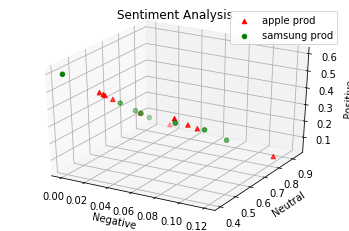

In [77]:
from nltk_helpers import get_sentiments, split_sentiments

# visualization part
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# build our figure
fig = plt.figure()
# build the axes
ax = fig.add_subplot(111, projection='3d')

appleX, appleY, appleZ = split_sentiments([get_sentiments(tweet) for tweet in apple_prod])
ax.scatter(appleX, appleY, appleZ, color = 'r', marker = '^', label = 'apple prod')

samX, samY, samZ = split_sentiments([get_sentiments(tweet) for tweet in samsung_prod])
ax.scatter(samX, samY, samZ, color = 'g', marker = 'o', label = 'samsung prod')


ax.set_xlabel('Negative')
ax.set_ylabel('Neutral')
ax.set_zlabel('Positive')
ax.legend()
plt.title('Sentiment Analysis')
plt.show()

## Generating a wordcloud
1. Collecting the data of features for the Apple product from ebay using Beautiful Soup and displaying them.

In [78]:
APPLE_URL = 'https://www.ebay.com/p/Apple-Watch-Series-3-38-mm-Smartwatch-GPS-Only-Silver-Aluminum-Case-White-Sport-Band-MTEY2LL-A/4026508995?iid=323836138945#UserReviews'

import requests
from bs4 import BeautifulSoup
page = requests.get(APPLE_URL)
soup = BeautifulSoup(page.text, 'html5lib')
body = soup.find('div', {'class':'description'})
article_text = body.text
print(article_text)

Product IdentifiersBrandAppleMPNMTEY2LL/AGTIN0190198805843ModelApple Watch Series 3eBay Product ID (ePID)4026508995Product Key FeaturesBand MaterialFluoroelastomerCase MaterialAluminumStorage Capacity8 GBManufacturer Band ColorWhiteFeaturesAltimeter, Accelerometer, Bluetooth Enabled, Water-Resistant, Heart Rate Monitor, Gyroscope, GPSBand ColorWhiteSeriesApple Watch Series 3Case Size38 mmCompatible Operating SystemiOS - AppleOperating SystemApple Watch OS


2. Storing the above collected data in a pkl file using pickle

In [79]:
import pickle
with open('apple_text.pkl', 'wb') as f:
    pickle.dump(article_text, f)

3. Importing required modules to generate a wordcloud

In [80]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt
import random

4. Reading the above collected data from a pkl file using pickle

In [81]:
with open('apple_text.pkl', 'rb') as f:
    words = pickle.load(f)

5. Defining a function for the proper alignment and fontsize. 

In [82]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

6. Using mask to generate a wordcloud in the shape of Apple logo and generating the wordcloud for the Apple product.

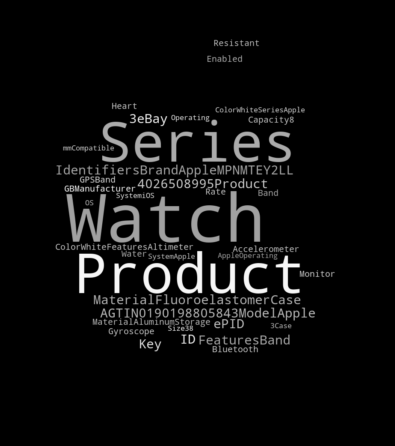

In [83]:
mask = np.array(Image.open(requests.get('https://cdn.macrumors.com/images-new/apple-logo.jpg', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 312, height = 312, background_color='black', stopwords=STOPWORDS, mask=mask).generate(words)
    plt.figure(figsize=(8,6),facecolor = 'black', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.imshow(word_cloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(words, mask)

7. Collecting the data of features for the Samsung product from ebay using Beautiful Soup and displaying them.

In [84]:
import requests
from bs4 import BeautifulSoup
Samsung_url ='https://en.wikipedia.org/wiki/Samsung_Gear_S3'
samsung_page = requests.get(Samsung_url)
soups = BeautifulSoup(samsung_page.text, 'html5lib')
#print(soups)
samsung_body = soups.find('table')
sams_text = samsung_body.text
print(sams_text)

Samsung Gear S3Gear S3 Frontier and ClassicDeveloperSamsung ElectronicsManufacturerSamsung ElectronicsProduct familySamsung GearTypeSmartwatchOperating systemTizen Version 4.0.0.2Display1.3" Super AMOLED, 360 x 360 pixelsInputCapacitive touchPower380 mAh, Qi inductive coil wireless chargingPredecessorSamsung Gear S2SuccessorSamsung Galaxy Watch


8. Storing the above collected data in a pkl file using pickle

In [85]:
import pickle
with open('samsung_text.pkl', 'wb') as f:
    pickle.dump(sams_text, f)

9. Reading the above collected data from a pkl file using pickle

In [86]:
with open('samsung_text.pkl', 'rb') as f:
    words = pickle.load(f)

10. Using mask to generate a wordcloud in the shape of Samsung logo and generating the wordcloud for the Samsung product.

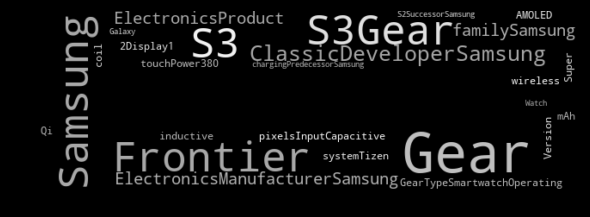

In [87]:
mask = np.array(Image.open(requests.get('http://pluspng.com/img-png/samsung-logo-png-file-samsung-logo-black-svg-640.png', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 312, height = 312, background_color='black', stopwords=STOPWORDS, mask=mask).generate(word)
    plt.figure(figsize=(8,6),facecolor = 'black', edgecolor='white')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.imshow(word_cloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(word, mask)

## Conclusion
1. Apple Watch Series 3 have slightly better customer review compared to Samsung Gear S3 because
there are more number of
positive reviews for Apple
Watch series 3 whereas
Samsung Gear S3 have
more neutral reviews when
sentiment analysis is
performed

2. The key features of both
products are summarized
and displayed by generating
wordclouds respectively for
each product.

3. A customer can come to an
overview of the features
and can compare reviews
of both the products.